# PRODUCT DUMMY DATA ANALYSIS

In this analysis I chose to focus on the regression model to predict the amount paid by the 360th day.

## 1. Importing Relevant Libraries and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ttest_ind

In [2]:
df=pd.read_csv('Data Science assessment.csv',sep=',')

## 2. Data Pre-Processing

#### i.) General Observations


The dataset contained 13 attributes and 9,195 observations.It was relatively clean since it had consistent column names, no missing data and appropriately initialized variables. 


In [3]:
#Getting the number of observations/ amount of data

df.shape

(9195, 13)

In [4]:
#Discovering the attributes of the data and ensuring consistency of column names

df.columns


Index(['Product', 'CustomerGender', 'Location', 'Region', 'TotalPrice',
       'StartDate', 'Deposit', 'DailyRate', 'TotalDays', 'AmountPaid30',
       'AmountPaid60', 'AmountPaid360', 'LoanStatus360'],
      dtype='object')

In [5]:
#Checking for missing values
df.isnull().sum()


Product           0
CustomerGender    0
Location          0
Region            0
TotalPrice        0
StartDate         0
Deposit           0
DailyRate         0
TotalDays         0
AmountPaid30      0
AmountPaid60      0
AmountPaid360     0
LoanStatus360     0
dtype: int64

In [6]:
#Checking that variables are initialized as the appropriate data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 13 columns):
Product           9195 non-null object
CustomerGender    9195 non-null object
Location          9195 non-null object
Region            9195 non-null object
TotalPrice        9195 non-null int64
StartDate         9195 non-null object
Deposit           9195 non-null int64
DailyRate         9195 non-null int64
TotalDays         9195 non-null int64
AmountPaid30      9195 non-null int64
AmountPaid60      9195 non-null int64
AmountPaid360     9195 non-null int64
LoanStatus360     9195 non-null object
dtypes: int64(7), object(6)
memory usage: 933.9+ KB


#### ii.) Variable Specific Observations

Further investigation of the data set revealed the following:

##### a.) Total Days Variable

The ‘Total Days’ variable was constant across all customers thus could not explain any variations across customers. As a result, I dropped the variable. Likewise, the  ‘Start Date’ variable didn't add much information since the 30 day, 60 day and 360 day amount paid columns captured customers payment information for the specified number of days regardless of the customers start date.

##### b.) Customer Gender Variable

The ‘Customer Gender’ column included an inappropriate value- ‘Not Specified’. These values were transformed into either male or female based on the total price of the product purchased by the customer. Analysis of the total price paid across gender revealed that there was a slight difference between the price paid by men and that paid by women.

##### c.) Region & Location Variables

The location variable contained very many unique observations which would hinder the creation of a parsimonious model. As a result, I dropped the variable and used the region variable instead since it still captured information on the location of the customers(a region is made up of numerous locations).

##### d.) Payment Plan (Product,Total Price, Daily Rate & Deposit Variables)

The total price of a product depended on the payment plan which a customer chose- i.e the deposit amount paid and the daily rate to be paid. Though most products had payment plans, product B only had a single payment plan.

In [7]:
#Viewing sample data points

df.sample(5)

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
1259,Product D,Male,Location 135,Region 1,20250,9/13/2013,2000,50,365,3401,4801,15851,Active
7762,Product B,Male,Location 25,Region 3,16600,4/18/2015,2000,40,365,4601,4601,16600,Finished Payment
5543,Product B,Female,Location 45,Region 3,16600,11/14/2014,2000,40,365,3010,3630,6990,Active
6291,Product C,Female,Location 202,Region 13,13775,1/10/2014,1000,35,365,2315,3390,12500,Active
2073,Product B,Female,Location 50,Region 1,16600,3/17/2015,2000,40,365,3321,4301,14331,Active


##### a.) Total Days

In [8]:
#Investigating the TotalDays variable

df['TotalDays'].unique()

array([365], dtype=int64)

In [9]:
#Dropping the TotalDays and StartDate Variable

df = df.drop(['TotalDays','StartDate'], axis=1)

##### b.) Gender

In [10]:
#Investigating the Gender Variable

df['CustomerGender'].value_counts()

Male            5358
Female          3290
NotSpecified     547
Name: CustomerGender, dtype: int64

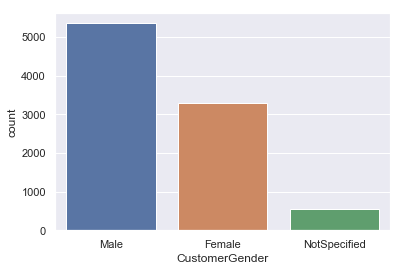

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x="CustomerGender", data=df)

In [12]:
#Replacing the 'NotSpecified' value with null values

df['CustomerGender']=df.loc[:,['CustomerGender']].replace('NotSpecified', np.nan)

In [13]:
#checking if the values have transformed to null

df['CustomerGender'].value_counts()

Male      5358
Female    3290
Name: CustomerGender, dtype: int64

In [14]:
#checking if the values have transformed to null

df.isnull().sum()

Product             0
CustomerGender    547
Location            0
Region              0
TotalPrice          0
Deposit             0
DailyRate           0
AmountPaid30        0
AmountPaid60        0
AmountPaid360       0
LoanStatus360       0
dtype: int64

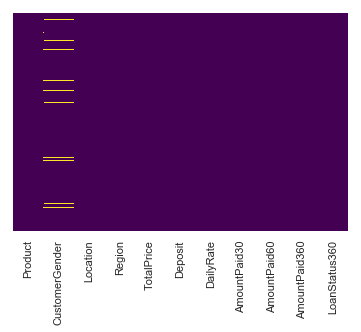

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
#Checking for differences between male and female attributes

df.groupby(['CustomerGender']).TotalPrice.mean().sort_values(ascending=False)

CustomerGender
Male      19641.843972
Female    19258.404255
Name: TotalPrice, dtype: float64

In [17]:
#Filling null values with the mode gender based on the Total Price of the product purchased

df['CustomerGender'].fillna(df.groupby('TotalPrice').CustomerGender.transform(lambda x: x.fillna(x.mode()[0])),inplace=True)

In [18]:
df.isnull().sum()

Product           0
CustomerGender    0
Location          0
Region            0
TotalPrice        0
Deposit           0
DailyRate         0
AmountPaid30      0
AmountPaid60      0
AmountPaid360     0
LoanStatus360     0
dtype: int64

In [19]:
df['CustomerGender'].value_counts()

Male      5366
Female    3829
Name: CustomerGender, dtype: int64

##### c.) Location & Region

In [20]:
#Investigating the Region and Location Variables

df['Region'].unique()

array(['Region 2', 'Region 3', 'Region 5', 'Region 1', 'Region 6',
       'Region 4', 'Region 7', 'Region 10', 'Region 11', 'Region 9',
       'Region 12', 'Region 8', 'Region 13', 'Region 14', 'Region 15',
       'Region 16', 'Region 17', 'Region 18'], dtype=object)

In [21]:
#Determining the number of unique locations

df['Location'].unique()

array(['Location 2', 'Location 3', 'Location 5', 'Location 6',
       'Location 7', 'Location 10', 'Location 11', 'Location 12',
       'Location 13', 'Location 15', 'Location 16', 'Location 17',
       'Location 19', 'Location 23', 'Location 27', 'Location 25',
       'Location 26', 'Location 29', 'Location 30', 'Location 31',
       'Location 33', 'Location 34', 'Location 35', 'Location 37',
       'Location 38', 'Location 39', 'Location 40', 'Location 41',
       'Location 42', 'Location 22', 'Location 43', 'Location 46',
       'Location 47', 'Location 50', 'Location 52', 'Location 53',
       'Location 54', 'Location 44', 'Location 56', 'Location 57',
       'Location 59', 'Location 60', 'Location 61', 'Location 62',
       'Location 64', 'Location 65', 'Location 66', 'Location 68',
       'Location 70', 'Location 72', 'Location 20', 'Location 73',
       'Location 75', 'Location 76', 'Location 77', 'Location 4',
       'Location 78', 'Location 79', 'Location 80', 'Location 81',
 

In [22]:
#Locations in each region

df.groupby(['Region']).Location.count().sort_values(ascending=False)

Region
Region 6     2934
Region 3     1941
Region 2     1364
Region 1     1232
Region 7      622
Region 4      588
Region 5      198
Region 13      62
Region 8       44
Region 12      39
Region 10      38
Region 9       33
Region 14      25
Region 15      22
Region 18      16
Region 17      14
Region 11      12
Region 16      11
Name: Location, dtype: int64

<Figure size 1440x1440 with 0 Axes>

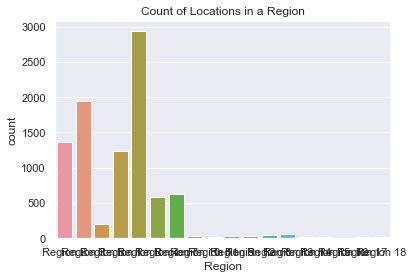

<Figure size 1440x1440 with 0 Axes>

In [23]:
ax = sns.countplot(x="Region", data=df)
ax.set_title('Count of Locations in a Region')
plt.figure(figsize=(20,20))

from this visualization, we can see that the regional data is heavil imbalanced and may be problematic to model. I however didnt exclude the variable at the onset since it may be significant in explaining our dependent variable.

In [24]:
df=df.drop(['Location'],axis=1)

#####  d.) Payment Plan (Product,Total Price, Daily Rate & Deposit Variables)

In [25]:
#Discovering the product sale options

df.groupby(['Product','TotalPrice','DailyRate','Deposit']).Deposit.unique()

Product    TotalPrice  DailyRate  Deposit
Product A  19250       50         1000       [1000]
           20250       50         2000       [2000]
           20750       50         2500       [2500]
           22250       50         4000       [4000]
Product B  16600       40         2000       [2000]
Product C  13775       35         1000       [1000]
           15600       40         1000       [1000]
Product D  16600       40         2000       [2000]
           20250       50         2000       [2000]
Product E  53625       125        8000       [8000]
           54625       125        9000       [9000]
Product F  69225       165        9000       [9000]
Name: Deposit, dtype: object

In [26]:
#Popularity of Deposit options across products

df.groupby(['Product']).Deposit.value_counts()

Product    Deposit
Product A  4000       1634
           1000       1008
           2000        340
           2500        159
Product B  2000       3862
Product C  1000        999
Product D  2000        975
Product E  9000        211
           8000          2
Product F  9000          5
Name: Deposit, dtype: int64

In [27]:
# Daily Rate Options across Products

df.groupby(['Product']).DailyRate.value_counts()

Product    DailyRate
Product A  50           3141
Product B  40           3862
Product C  40            937
           35             62
Product D  50            949
           40             26
Product E  125           213
Product F  165             5
Name: DailyRate, dtype: int64

## 3. Feature Engineering

The target variable in this study is the loan amount paid. However using this variable as is may be misleading as it implies that customers who has paid the same amount are equally desirable without taking into consideration the total amount of the purchased product. For example, consider two customers who purchased 2 different products. Customer A purchased product C for Kshs.13,775 and customer B purchase product F for Kshs.69,225. Supposing the two customers each paid 6,922.50 toward their loan. Viewing the absolute amount paid would consider both customers equally desirable. However, in the business sense, customer A is preferred to customer B since the amount paid represents 50% of customer A’s purchase and only 10% of customer B’s purchase.

Further, since the absolute value of the loan paid is not limited and can take on any amount, it would be possible to estimate an amount paid which is beyond the total price of a product. The latter would be erroneous since no one would be willing to pay more than the quoted price of a product in the real world.

Similarly, the variables detailing the amounts paid by the 30th and 60th days were converted into percentage terms. The values were calculated as percentages of what was supposed to have been paid by the 30th and 60th days according to the payment plans and including the deposit. Comparing the amount paid by the amount required is better than comparing the amount paid to the total price as the latter gives us information about if the customer adheres to the payment plan or not. We are therefore able to estimate the amount a customer is likely to pay based on how well they adhere to the payment plan. As for the amount paid by the 360th day I compared the value with the total amount since some customers have finished their payments meaning that if I compared the amount paid by the 360th day to the amount required by that day, I would get a value greater than 100% which is undesirable.


In [28]:
#Transforming the amount paid into percentage terms based on the required payment at the time

df['AmtRequired30']=df['DailyRate']*30+df['Deposit']
df['AmtRequired60']=df['DailyRate']*60+df['Deposit']

df['PercPaid30'] =df['AmountPaid30']/df['AmtRequired30']
df['PercPaid60'] =df['AmountPaid60']/df['AmtRequired60']

In [29]:
#Transforming the amount paid into percentage terms based on the total price of the product

df['PercPaid360'] = df.AmountPaid360/df.TotalPrice

In [30]:
df.loc[df['LoanStatus360']=='Finished Payment'].sample()

,Product,CustomerGender,Region,TotalPrice,Deposit,DailyRate,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360,AmtRequired30,AmtRequired60,PercPaid30,PercPaid60,PercPaid360
8481,Product D,Male,Region 15,20250,2000,50,6251,6251,20250,Finished Payment,3500,5000,1.786,1.2502,1.0


In [31]:
df = df.drop(['AmountPaid30','AmountPaid60','AmountPaid360','AmtRequired30','AmtRequired60'], axis=1)

In [32]:
df.columns

Index(['Product', 'CustomerGender', 'Region', 'TotalPrice', 'Deposit',
       'DailyRate', 'LoanStatus360', 'PercPaid30', 'PercPaid60',
       'PercPaid360'],
      dtype='object')

## 4. Data Exploration and Hypothesis Test

### i.) Categorical Data

The categorical variables in the dataset are:
    
    a.) Products
    b.) Customer Gender
    c.) Region
    d.) Loan Status

In [33]:
df.columns

Index(['Product', 'CustomerGender', 'Region', 'TotalPrice', 'Deposit',
       'DailyRate', 'LoanStatus360', 'PercPaid30', 'PercPaid60',
       'PercPaid360'],
      dtype='object')

#### a.) Products

The products B and A were the most popular products purchased during the period under study. On the other hand, products E and F were the least desirable with only 5 units of product F sold. The latter may have been influenced by price since product F was the most expensive whereas product B was on the most affordable options.

As per the 360th day, customers are expected to have completed 98.6% of their payments. However, the average percentage of payments made across products was way below this mark, with payments towards products A and F recording the worst performance.

An Analysis of Variance (ANOVA) was carried out to see if the percentage of the loan paid across different products was statistically significant. The null and alternative hypothesis of the ANOVA are as follows:
H0: there is no statistically significant difference in means of the samples.
H1: there is a statistically significant difference at least one of means of the samples.

The low p-value obtained means that we reject the null hypothesis that there is no statistical difference in the percentage of the loan paid across products. We therefore used this variable as an explanatory variable.


In [34]:
#Looking at the popularity of different products

df.Product.value_counts()

Product B    3862
Product A    3141
Product C     999
Product D     975
Product E     213
Product F       5
Name: Product, dtype: int64

Text(0.5, 1.0, 'Product Popularity')

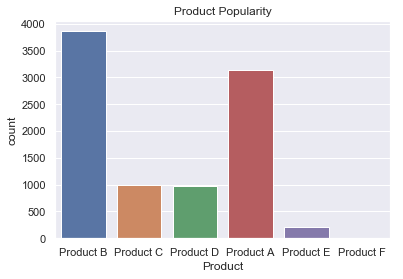

In [35]:
ax = sns.countplot(x="Product", data=df)
ax.set_title('Product Popularity')

In [36]:
#Looking at the average price across products

ProdPrice=pd.DataFrame(df.groupby(['Product']).TotalPrice.mean().sort_values())
ProdPrice

,TotalPrice
Product,
Product C,15486.736737
Product B,16600.000000
Product D,20152.666667
Product A,20994.826488
Product E,54615.610329
Product F,69225.000000


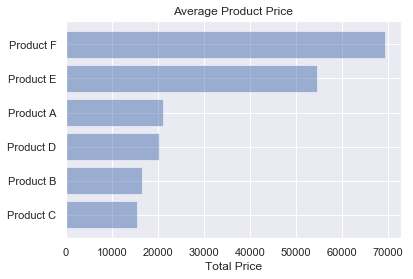

In [37]:
y_pos = np.arange(len(ProdPrice))
plt.barh(y_pos, ProdPrice.TotalPrice, align='center', alpha=0.5)

plt.xlabel('Total Price')
plt.title('Average Product Price')
plt.yticks(y_pos, ProdPrice.index)

plt.show()

In [38]:
#Examining the average amount paid across products

gp=df.groupby(['Product'])
ProdPerc360=pd.DataFrame(gp.PercPaid360.mean().sort_values(ascending=False))
ProdPerc360

,PercPaid360
Product,
Product C,0.836235
Product D,0.800864
Product B,0.787016
Product E,0.776317
Product F,0.731455
Product A,0.698310


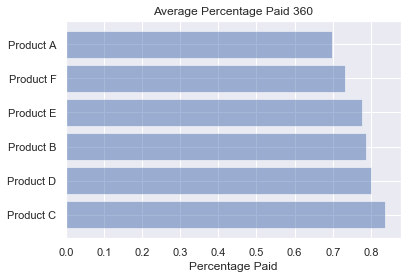

In [39]:
y_pos = np.arange(len(ProdPerc360))
plt.barh(y_pos, ProdPerc360.PercPaid360, align='center', alpha=0.5)

plt.xlabel('Percentage Paid')
plt.title('Average Percentage Paid 360')
plt.yticks(y_pos, ProdPerc360.index)

plt.show()

In [40]:
A=gp.get_group('Product A').PercPaid360
B=gp.get_group('Product B').PercPaid360
C=gp.get_group('Product C').PercPaid360
D=gp.get_group('Product D').PercPaid360
E=gp.get_group('Product E').PercPaid360
F=gp.get_group('Product F').PercPaid360

In [41]:
f_oneway(A,B,C,D,E,F)

F_onewayResult(statistic=77.28721629548306, pvalue=1.2165049272447644e-79)

#### b.) Gender

During the review period, more men purchased items as opposed to women. On average, men also purchased items worth more than women on and paid 1% more than women towards their loans. Product B was purchased most across '

Since the variable only had 2 categories and was a sample of data, a student's t-test was carried out on the data. The null and alternative hypothesis of a t-test are as follows:

H0: there is no significant statistical difference of the means of the samples.
H1: there is a significant statistical difference of the means of the samples.

The resulting p-value of 0.76, therefore means that we fail to reject the null hypothesis that there is no statisticall difference in the loan percentage paid on the 360th day between men and women.

In [42]:
df.CustomerGender.value_counts()

Male      5366
Female    3829
Name: CustomerGender, dtype: int64

In [43]:
c=df.groupby(['CustomerGender'])

In [44]:
CustPrice=pd.DataFrame(c.TotalPrice.mean().sort_values(ascending=False))
CustPrice

,TotalPrice
CustomerGender,
Male,19639.349609
Female,18743.418647


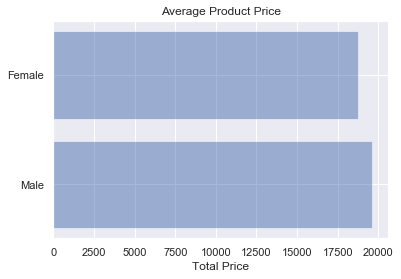

In [45]:
y_pos = np.arange(len(CustPrice))
plt.barh(y_pos, CustPrice.TotalPrice, align='center', alpha=0.5)

plt.xlabel('Total Price')
plt.title('Average Product Price')
plt.yticks(y_pos, CustPrice.index)

plt.show()

In [46]:
CustPerc=pd.DataFrame(c.PercPaid360.mean())
CustPerc

,PercPaid360
CustomerGender,
Female,0.764157
Male,0.762605


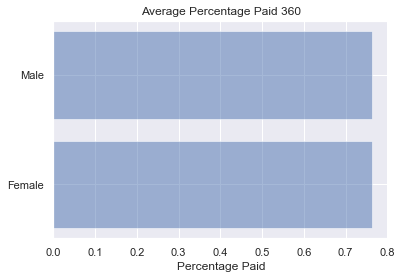

In [47]:
y_pos = np.arange(len(CustPerc))
plt.barh(y_pos, CustPerc.PercPaid360, align='center', alpha=0.5)

plt.xlabel('Percentage Paid')
plt.title('Average Percentage Paid 360')
plt.yticks(y_pos, CustPerc.index)

plt.show()

In [48]:
df.iloc[:,:2].groupby(['CustomerGender']).agg(pd.Series.mode)

,Product
CustomerGender,
Female,Product B
Male,Product B


In [49]:
M=c.get_group('Male').PercPaid360
F=c.get_group('Female').PercPaid360

ttest_ind(M,F)


(-0.30012450646241884, 0.7640889729142258, 9193.0)

#### c.) Areas of operation

Region 14 has the highest average purchases but ne of the lowest percentage paid as at the 360th day. There seems to be some degree of variation across regions with regards to the percentage paid meaning that the regions could be an interesting explanatory variable to the percentage paid.

The small p-value means that we reject the null hypothesis that there is no statistically significant difference in loan repayment across different regions. Therefore the Region of a customer is a factor determining their repayment.

In [50]:
r=df.groupby(['Region'])

In [51]:
df.Region.unique()

array(['Region 2', 'Region 3', 'Region 5', 'Region 1', 'Region 6',
       'Region 4', 'Region 7', 'Region 10', 'Region 11', 'Region 9',
       'Region 12', 'Region 8', 'Region 13', 'Region 14', 'Region 15',
       'Region 16', 'Region 17', 'Region 18'], dtype=object)

In [52]:
#Average sales by region

RegPrice=pd.DataFrame(r.TotalPrice.mean().sort_values())
RegPrice

,TotalPrice
Region,
Region 13,13775.000000
Region 8,16279.545455
Region 9,16828.787879
Region 5,17128.787879
Region 11,17233.333333
Region 17,17310.714286
Region 18,17387.500000
Region 12,17450.000000
Region 10,17489.473684


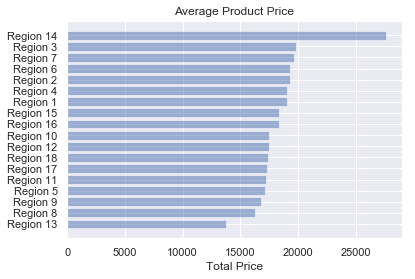

In [53]:
y_pos = np.arange(len(RegPrice))
plt.barh(y_pos, RegPrice.TotalPrice, align='center', alpha=0.5)

plt.xlabel('Total Price')
plt.title('Average Product Price')
plt.yticks(y_pos, RegPrice.index)

plt.show()

In [54]:
#Average percentage paid by region

RegPerc=pd.DataFrame(r.PercPaid360.mean().sort_values())
RegPerc

,PercPaid360
Region,
Region 13,0.562896
Region 14,0.645496
Region 7,0.735650
Region 2,0.740720
Region 1,0.740958
Region 17,0.748390
Region 3,0.757196
Region 16,0.771671
Region 10,0.774790


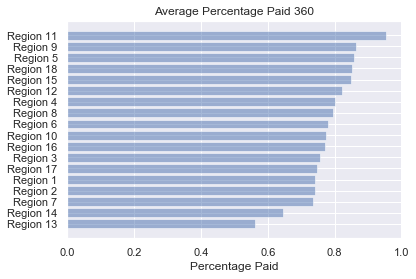

In [55]:
y_pos = np.arange(len(RegPerc))
plt.barh(y_pos, RegPerc.PercPaid360, align='center', alpha=0.5)

plt.xlabel('Percentage Paid')
plt.title('Average Percentage Paid 360')
plt.yticks(y_pos, RegPerc.index)

plt.show()

In [56]:
R1=r.get_group('Region 1').PercPaid360
R2=r.get_group('Region 2').PercPaid360
R3=r.get_group('Region 3').PercPaid360
R4=r.get_group('Region 4').PercPaid360
R5=r.get_group('Region 5').PercPaid360
R6=r.get_group('Region 6').PercPaid360
R7=r.get_group('Region 7').PercPaid360
R8=r.get_group('Region 8').PercPaid360
R9=r.get_group('Region 9').PercPaid360
R10=r.get_group('Region 10').PercPaid360
R11=r.get_group('Region 11').PercPaid360
R12=r.get_group('Region 12').PercPaid360
R13=r.get_group('Region 13').PercPaid360
R14=r.get_group('Region 14').PercPaid360
R15=r.get_group('Region 15').PercPaid360

In [57]:
#ANOVA analysis

f_oneway(A,B,C,D,E,F)

F_onewayResult(statistic=76.82693214487614, pvalue=1.2016449826170764e-79)

#### d.) Loan Status

In [58]:
df.LoanStatus360.value_counts()

Active              6742
Finished Payment    1604
Blocked              849
Name: LoanStatus360, dtype: int64

Text(0.5, 1.0, 'Custmer Loan Status')

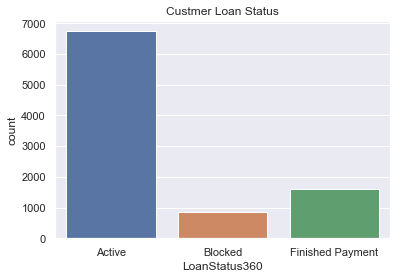

In [59]:
ax = sns.countplot(x="LoanStatus360", data=df)
ax.set_title('Custmer Loan Status')

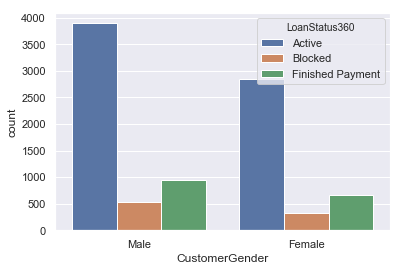

In [60]:
ax = sns.countplot(x="CustomerGender",hue="LoanStatus360", data=df)

In [61]:
df.groupby(['LoanStatus360']).PercPaid30.mean().sort_values(ascending=False)

LoanStatus360
Finished Payment    1.292658
Active              0.868872
Blocked             0.792282
Name: PercPaid30, dtype: float64

In [62]:
df.groupby(['LoanStatus360']).PercPaid60.mean().sort_values(ascending=False)

LoanStatus360
Finished Payment    1.215063
Active              0.869252
Blocked             0.732946
Name: PercPaid60, dtype: float64

In [63]:
LoanPerc=pd.DataFrame(df.groupby(['LoanStatus360']).PercPaid360.mean().sort_values(ascending=False))
LoanPerc

,PercPaid360
LoanStatus360,
Finished Payment,1.000000
Active,0.761503
Blocked,0.329857


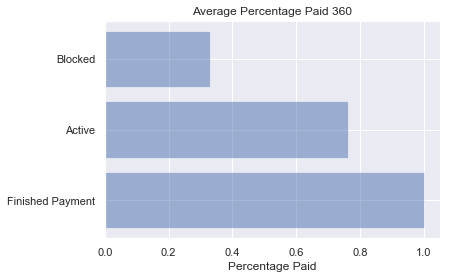

In [64]:
y_pos = np.arange(len(LoanPerc))
plt.barh(y_pos, LoanPerc.PercPaid360, align='center', alpha=0.5)

plt.xlabel('Percentage Paid')
plt.title('Average Percentage Paid 360')
plt.yticks(y_pos, LoanPerc.index)

plt.show()

### ii.) Continuous Data

### a.) Summary Statistics

The summary statistics of the continous variables are elaborated below:

    a.) Total Price
The average total price of products is Kshs.19,266 although this value varies on average by Kshs.6,053. The most affordable product costs Kshs.13,775 whereas the most expensive product costs 69,225. However, most of the products cost less than Kshs.20,250. There is a slight difference between the mean and the median suggesting that the prices are positively skewed.

    b.) Deposit
The average value for deposits is approximately Kshs.2,312 although on average this varies by Kshs.1,412. The least amount a customer has left as a deposit is 1000 whereas the highest deposit is Kshs.9000. Most of the deposits are of Kshs.2000. The mean is very similar to the median indicating that the deposits are only slightly positively skewed.

    c.) Daily Rate
The average daily rate paid is Kshs.46 although on average this amount varies by Kshs.13. The least daily rate paid by a customer is Kshs.35 whereas the highest is Kshs.165. Most customers are required to pay a daily rate of less than Kshs.50. The mean is slightly higher than the median indicating that the Daily rates are also positively skewed.

    d.) Percentage Paid 30 and 60
The amount paid by customers as of 30th day is on average 93.6% of the required amount signifying that the customers on average follow the payment plan closely though not perfectly. However, this commitment to the payment plan reduces slightly by the 60th day to 91.7%. The variation in adherence also reduces across customers from 53.4% to 38.5%. The minimum percentage paid by customers as of the 30th day is -128% of the required amount. The minimum percentage paid then increases to -80%. From the data set it is not very clear what a negative amount paid means but clarification around the matter would aid in appropriate feature engineering. However, for the purposes of this exercise, it is assumed that a negative amount paid is indicative of accrued interest being greater than the amount paid by a customer. Most of the customers pay less than 106.9% of the required amount by the 30th day. This amount futher reduces to 104.5% bythe 60th day. Close to 50% of customers pay more than the required amount as at the 30th day this number reduces slightly as at the 60th day.

    f.) Percentage Paid 360
On average, customers complete 76.4% of the payment by the 360th day. The percentage paid varies by 24.4% among the obsereved customers. The least percentage paid is -16.6% and the highest amount paid is 100%. Most customers have paid of less than 97.2% of their loans. The data is positively skewed since the median(84.7%) is greater than the mean.

The total price, deposit and daily rate variables contain relatively large variances thus may need to be scaled.

##### Correlation Analysis
A correlation analysis revealed that the percentage paid as at day 30 and that paid as at day 60 were very highly correlated thus in a bid to avoid multi-colinerity, I dropped the variable describing the percentage paid as at day 30.
The total price and Deposit Rate were dropped rather since the were highlly correlated nd introduced multicolinearity to the model.

In [65]:
df. describe()

,TotalPrice,Deposit,DailyRate,PercPaid30,PercPaid60,PercPaid360
count,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000
mean,19266.264274,2311.528004,46.451332,0.935727,0.916991,0.763252
std,6053.291677,1412.612091,13.375759,0.534184,0.385249,0.244439
min,13775.000000,1000.000000,35.000000,-1.280000,-0.800000,-0.166234
25%,16600.000000,2000.000000,40.000000,0.909091,0.832045,0.616898
50%,16600.000000,2000.000000,40.000000,0.990909,0.972955,0.847191
75%,20250.000000,2000.000000,50.000000,1.069063,1.045455,0.972354
max,69225.000000,9000.000000,165.000000,6.098636,3.952941,1.000000


In [66]:
#Correlation Analysis

df.corr()

,TotalPrice,Deposit,DailyRate,PercPaid30,PercPaid60,PercPaid360
TotalPrice,1.000000,0.865541,0.989444,-0.043246,-0.040404,-0.021071
Deposit,0.865541,1.000000,0.783827,0.180569,0.166667,0.070153
DailyRate,0.989444,0.783827,1.000000,-0.105866,-0.098320,-0.046424
PercPaid30,-0.043246,0.180569,-0.105866,1.000000,0.922890,0.441998
PercPaid60,-0.040404,0.166667,-0.098320,0.922890,1.000000,0.543939
PercPaid360,-0.021071,0.070153,-0.046424,0.441998,0.543939,1.000000


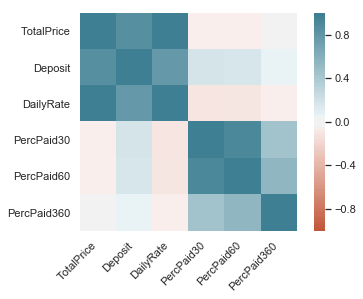

In [67]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [68]:
df = df.drop(['PercPaid30','TotalPrice','Deposit'], axis=1)

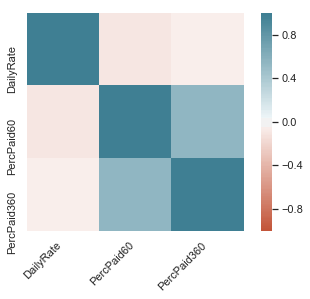

In [69]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [70]:
df.columns

Index(['Product', 'CustomerGender', 'Region', 'DailyRate', 'LoanStatus360',
       'PercPaid60', 'PercPaid360'],
      dtype='object')

##### Feature scaling

I used the Standard scaler to scale the daily rate and percentage paid at day 60 variables

In [71]:
standardisation = preprocessing.StandardScaler()
df[['DailyRate', 'PercPaid60']]= standardisation.fit_transform(df[['DailyRate', 'PercPaid60']])  


C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


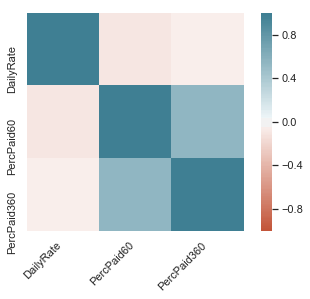

In [72]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## 4. Encoding Categorical Variables

To use the categorical variables in regression analysis, I have to first encode them to numerical values. Since the data is not ordinal, I converted them to dummy variables. Further to avoid multicolinearity and the dummy variable bias, I dropped a category for each categorical variable. For example, in the product categorical variable, I dropped Product A.

In [73]:
df.head()

,Product,CustomerGender,Region,DailyRate,LoanStatus360,PercPaid60,PercPaid360
0,Product B,Male,Region 2,-0.482341,Active,0.121676,0.820542
1,Product B,Male,Region 3,-0.482341,Active,0.080378,0.906084
2,Product C,Female,Region 5,-0.482341,Active,0.123862,0.983333
3,Product B,Male,Region 1,-0.482341,Active,0.121676,0.922952
4,Product D,Female,Region 2,0.265320,Active,0.122029,0.677531


In [74]:
pdummies=pd.get_dummies(df.Product)
cgdummies=pd.get_dummies(df.CustomerGender)
rdummies=pd.get_dummies(df.Region)
lsdummies=pd.get_dummies(df.LoanStatus360)

df=pd.concat([df,pdummies,cgdummies,rdummies,lsdummies],axis='columns')
df=df.drop(['CustomerGender','Region','LoanStatus360','Product','Product A','Male','Region 1','Finished Payment'],axis='columns')

In [75]:
df.sample(5)

,DailyRate,PercPaid60,PercPaid360,Product B,Product C,Product D,Product E,Product F,Female,Region 10,...,Region 2,Region 3,Region 4,Region 5,Region 6,Region 7,Region 8,Region 9,Active,Blocked
7482,0.265320,0.631338,0.530914,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7112,0.265320,-0.173899,0.294382,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7467,-0.482341,-0.196908,0.288012,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1334,-0.482341,0.451468,0.787349,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7198,0.265320,-0.025564,0.528090,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


## 5. Regression Analysis

In [76]:
df.columns

Index(['DailyRate', 'PercPaid60', 'PercPaid360', 'Product B', 'Product C',
       'Product D', 'Product E', 'Product F', 'Female', 'Region 10',
       'Region 11', 'Region 12', 'Region 13', 'Region 14', 'Region 15',
       'Region 16', 'Region 17', 'Region 18', 'Region 2', 'Region 3',
       'Region 4', 'Region 5', 'Region 6', 'Region 7', 'Region 8', 'Region 9',
       'Active', 'Blocked'],
      dtype='object')

In [77]:
#first, I initialize my dependent and independent variables and split them into my test and training datasets

X = df[[ 'DailyRate', 'PercPaid60', 'Product B', 'Product C',
       'Product D', 'Product E', 'Product F', 'Female', 'Region 10',
       'Region 11', 'Region 12', 'Region 13', 'Region 14', 'Region 15',
       'Region 16', 'Region 17', 'Region 18', 'Region 2', 'Region 3',
       'Region 4', 'Region 5', 'Region 6', 'Region 7', 'Region 8', 'Region 9',
       'Blocked', 'Active']]
y = df["PercPaid360"]
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [78]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            PercPaid360   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     397.2
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        21:58:03   Log-Likelihood:                 3229.3
No. Observations:                7356   AIC:                            -6403.
Df Residuals:                    7328   BIC:                            -6209.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9270      0.015     63.511      0.0

## Model Evaluation

#### R-Squared
The model yeilded an Rsquared value of 0.594. This means that 59.4% of the variation obsereved in the data can be explained by the model. The model's fit may be attributed to the following:
 
1. Though some factors like region and product seemed to be independently significant, they proved to only be partially significant when considering other factors in the model. That is- some regions were significant(had a p-value of less than 0.05) whereas others were statistically insignificant. The latter was the same for the products. A solution to this problem would be to classify the regions in a more efficient manner. Analysis of the variable showed that it was highly skewed which could have affected the results of the model. Similarly, dividing the products into productlines may have been a better approach.
 
2. The constant in the model is strongly statistically significant which could point to unobserved factors. Increasing relevant customer attributes such as age, income or occupation is likely to improve the model.
 
3. It is also likely that the myriad of factor included in the model shifted the relationship away from the simple Linear relationship and towards a more complex relationship. A more complex polynomial model may improve the results of the model.

#### F-Test
The null and alternative hypotheses of the F-test are as follows:
H0: The fit of the intercept-only model and your model are equal (the model doesn't explain the dependent variable)
Ha: The fit of the intercept-only model is significantly reduced compared to your model (the model explains the dependent variable)
Since the p-value for the F-test is 0.00 we fail to accept the null hypothesis and therefore we can say that we are 99% confident that the model has some explanatory power.


## Model Interpretation & Business Implications

The significant Variables from the model are as follows:

##### 1. PercPaid60 99% CI

Based on the model, we can be 99% confident that the customer's adherance to the payment plan as at the 60th day is a significant determinant of the percentage of which a customer will have paid as at the 360th day. An increase in the percentage paid as at the 60th day by 1% increases percentage paid as at the 360th day by 9%.
The business implication of this finding would be to encourage customers to adhere to the payment plans using reminders or reward initiatives.

##### 2. Products (Product D) 99% CI

Similarly the model reveals that we can be 99% confident that purchasing product D reduces a customer's percentage paid as at the 360th day by 1.96% in comparison to purchases of product A.
The business implication of this would be to limit the sale of product D to more credit worthy customers who have a higher income or increase the deposit required to purchase product D.

##### 3. Gender 90% CI

We are also 90% confident that female customers pay 0.65% less of their total loan amount in comparison to their male counterparts. The business implication would be to create marketing strategies towards encouraging women to pay back loans or to target the products more towards men.

##### 4. Region(13 99%CI,2 95%CI,4 95%CI)

From the model, we can be 99% confident that customers in Region 13 pay 24.7% less of their total loan amount in comparison to other region 1. Similarly, we can be 95% confident that customers in Region 2 pay 1.4% less of their loans than customers in region 1. Lastly, we can be 95% certain that customers in Region 4 pay 2.2% more of their loans in comparison to other regions.
The business implication would be to create targetted campaigns advertisements to regions 2 and 13 to encourage customers in that region to adhere t their payments. They could also introduce payment incentives in these areas such as discounts on consistent payments. Futher, the company could increase sales to region 4 since they are more likely to pay bac their loans.

##### 5. Loan Status 99% CI

We can be 99% confident that blocked customers pay 55.9% less than other customers. Further, we are 99% confident that active users pay 15.5% less of their loans in comparison to those that have fulfilled their payments. 